# Deep Learning for Image Classification, Part 3
Easily viewed in [Google Colab](https://colab.research.google.com/drive/15CU6b_pbAHsRYAsAMBw3dZ2Jh85fe0Fj?usp=sharing). 

### Imports

In [32]:
import numpy as np
import os
import matplotlib.pyplot as plt
import tensorflow as tf

### Read the selected MedMNIST data set into a `python dictionary` 


In [33]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [34]:
%cd /content/drive/MyDrive/Colab Notebooks/Make School Winter 2021 Intensive
%ls

/content/drive/MyDrive/Colab Notebooks/Make School Winter 2021 Intensive
 DeepLearning3.ipynb                                        octmnist.npz
"Laine's copy of fashion_MNIST_classification_jcat.ipynb"


In [35]:
MedMNIST = np.load("octmnist.npz")

In [36]:
print(MedMNIST)

In [37]:
MedMNIST.files

['train_images',
 'val_images',
 'test_images',
 'train_labels',
 'val_labels',
 'test_labels']

### Extract Data

In [38]:
train_labels = MedMNIST['train_labels'].squeeze()
train_images = MedMNIST['train_images']

val_labels = MedMNIST['val_labels'].squeeze()
val_images = MedMNIST['val_images']

test_labels = MedMNIST['test_labels'].squeeze()
test_images = MedMNIST['test_images']

### Check for correct format

In [39]:
print(train_labels.shape)
print(train_images.shape)

(97477,)
(97477, 28, 28)


In [40]:
print(val_labels.shape)
print(val_images.shape)

(10832,)
(10832, 28, 28)


In [41]:
print(test_labels.shape)
print(test_images.shape)

(1000,)
(1000, 28, 28)


## Build and Test a Classifier
### Preprocess the Data

In [42]:
print(train_labels[0:10])

[0 3 3 3 0 3 1 0 3 3]


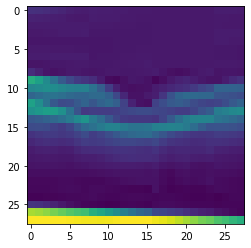

In [43]:
plt.figure()
plt.imshow(train_images[50000])

plt.grid(False)
plt.show()

### Scale values to a range of 0 to 1

In [44]:
train_images = train_images / 255.0
val_images = val_images / 255.0
test_images = test_images / 255.0

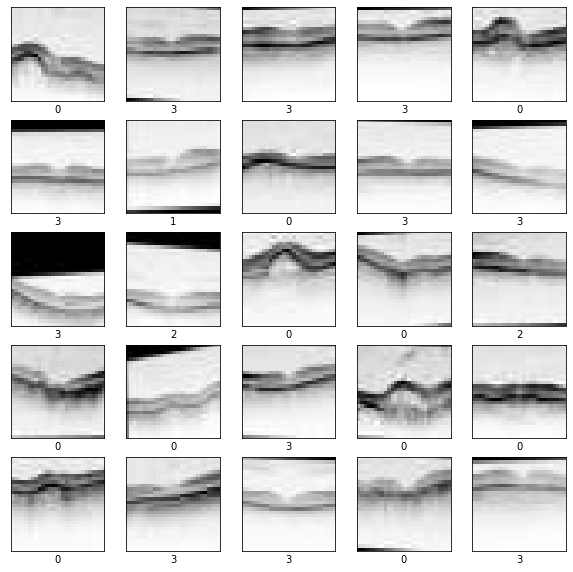

In [46]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(train_labels[i])
plt.show()

### Set up layers

In [82]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(4)  # changed from 10 to 4 after the evaluation made in the next cell
])

In [48]:
unique_labels = set(train_labels)
print(unique_labels)

{0, 1, 2, 3}


### Compile the Model

In [83]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

### Train the Model

In [84]:
model.fit(train_images, train_labels, epochs=4)

Epoch 1/4
3047/3047 [==============================] - 6s 2ms/step - loss: 1.0230 - accuracy: 0.5929
Epoch 2/4
3047/3047 [==============================] - 5s 2ms/step - loss: 0.8453 - accuracy: 0.6842
Epoch 3/4
3047/3047 [==============================] - 5s 2ms/step - loss: 0.7526 - accuracy: 0.7262
Epoch 4/4
3047/3047 [==============================] - 5s 2ms/step - loss: 0.6933 - accuracy: 0.7494


In [85]:
val_loss, val_acc = model.evaluate(val_images, val_labels, verbose=2)

339/339 - 0s - loss: 0.6508 - accuracy: 0.7695


## Experiments to Improve the Model
<ul>
<li>Increase Nodes</li>
<li>Decrease Nodes</li>
<li>Add a layer</li>
<li>Add another layer</li>
<li>Position Nodes as decreasing through multiple layers</li>
<li>Position Nodes as increasing through multiple layers</li>
</ul>

### Add a layer

In [55]:
two_layer_model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(128, activation="relu"),
    tf.keras.layers.Dense(4)
])


In [57]:
two_layer_model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [58]:
two_layer_model.fit(train_images, train_labels, epochs=4)

Epoch 1/4
3047/3047 [==============================] - 7s 2ms/step - loss: 1.0022 - accuracy: 0.6002
Epoch 2/4
3047/3047 [==============================] - 6s 2ms/step - loss: 0.7847 - accuracy: 0.7090
Epoch 3/4
3047/3047 [==============================] - 6s 2ms/step - loss: 0.6934 - accuracy: 0.7462
Epoch 4/4
3047/3047 [==============================] - 6s 2ms/step - loss: 0.6544 - accuracy: 0.7625


In [59]:
val_loss, val_acc = two_layer_model.evaluate(val_images, val_labels, verbose=2)

339/339 - 0s - loss: 0.6258 - accuracy: 0.7788


<font color="red">
Adding a layer decreased the loss from 0.6830 to 0.6258 and increased the accuracy from 0.7542 to 0.7788 , and therefore appears to be <strong>benificial</strong>
</font>

### Add Another Layer

In [60]:
three_layer_model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(128, activation="relu"),
    tf.keras.layers.Dense(128, activation="relu"),
    tf.keras.layers.Dense(4)
])

In [61]:
three_layer_model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [81]:
three_layer_model.fit(train_images, train_labels, epochs=4)

Epoch 1/4
3047/3047 [==============================] - 7s 2ms/step - loss: 0.5481 - accuracy: 0.8009
Epoch 2/4
3047/3047 [==============================] - 7s 2ms/step - loss: 0.5373 - accuracy: 0.8063
Epoch 3/4
3047/3047 [==============================] - 7s 2ms/step - loss: 0.5263 - accuracy: 0.8094
Epoch 4/4
3047/3047 [==============================] - 7s 2ms/step - loss: 0.5172 - accuracy: 0.8117


In [63]:
val_loss, val_acc = three_layer_model.evaluate(val_images, val_labels, verbose=2)

339/339 - 0s - loss: 0.6334 - accuracy: 0.7682


<font color="red">
Adding a third layer appears to be <strong>detrimental</strong>. Loss increased from 0.6258 for the two layer model, to 0.6334 and Accuracy decreased from 0.7788 for the two layer model, to 0.7682 .
</font>

### Increase the Nodes

In [65]:
increased_nodes_model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(4)
])

In [66]:
increased_nodes_model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [68]:
increased_nodes_model.fit(train_images, train_labels, epochs=4)

Epoch 1/4
3047/3047 [==============================] - 8s 2ms/step - loss: 1.0110 - accuracy: 0.5971
Epoch 2/4
3047/3047 [==============================] - 7s 2ms/step - loss: 0.8060 - accuracy: 0.7024
Epoch 3/4
3047/3047 [==============================] - 7s 2ms/step - loss: 0.7128 - accuracy: 0.7411
Epoch 4/4
3047/3047 [==============================] - 7s 2ms/step - loss: 0.6691 - accuracy: 0.7577


In [87]:
print("Original model with nodes at 128:")
val_loss, val_acc = model.evaluate(val_images, val_labels, verbose=2)
print("Nodes increased to 256:")
val_loss, val_acc = increased_nodes_model.evaluate(val_images, val_labels, verbose=2)

Original model with nodes at 128:
339/339 - 0s - loss: 0.6508 - accuracy: 0.7695
Nodes increased to 256:
339/339 - 0s - loss: 0.6606 - accuracy: 0.7614


<font color="red">
Increasing the number of nodes appears to be <strong>detrimental</strong>. Loss increased from 0.6508 in the original model to 0.6606 and Accuracy decreased from 0.7695 to 0.7614 .
</font>

### Doubly increase the nodes


In [70]:
doubly_increased_nodes_model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(4)
])

In [71]:
doubly_increased_nodes_model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [72]:
doubly_increased_nodes_model.fit(train_images, train_labels, epochs=4)

Epoch 1/4
3047/3047 [==============================] - 7s 2ms/step - loss: 1.0190 - accuracy: 0.5960
Epoch 2/4
3047/3047 [==============================] - 7s 2ms/step - loss: 0.8126 - accuracy: 0.6968
Epoch 3/4
3047/3047 [==============================] - 7s 2ms/step - loss: 0.7179 - accuracy: 0.7393
Epoch 4/4
3047/3047 [==============================] - 7s 2ms/step - loss: 0.6697 - accuracy: 0.7580


In [86]:
print("Original model with nodes at 128:")
val_loss, val_acc = model.evaluate(val_images, val_labels, verbose=2)
print("Nodes increased to 256:")
val_loss, val_acc = increased_nodes_model.evaluate(val_images, val_labels, verbose=2)
print("Nodes increased to 512:")
val_loss, val_acc = doubly_increased_nodes_model.evaluate(val_images, val_labels, verbose=2)

Original model with nodes at 128:
339/339 - 0s - loss: 0.6508 - accuracy: 0.7695
Nodes increased to 256:
339/339 - 0s - loss: 0.6606 - accuracy: 0.7614
Nodes increased to 512:
339/339 - 0s - loss: 0.6725 - accuracy: 0.7569


<font color="red">
<u><strong>Conclusion</u></strong>:<br>
Doubly increasing the nodes to 512 appears to also be <strong>detrimental</strong> in comparison to increasing them to 256. It does not decrease the loss or increase the accuracy in comparison to the model with 256 nodes.</font>

### Decrease the Nodes

In [88]:
decreased_nodes_model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(4)
])

In [89]:
decreased_nodes_model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [90]:
decreased_nodes_model.fit(train_images, train_labels, epochs=4)

Epoch 1/4
3047/3047 [==============================] - 5s 1ms/step - loss: 1.0490 - accuracy: 0.5747
Epoch 2/4
3047/3047 [==============================] - 4s 1ms/step - loss: 0.8788 - accuracy: 0.6709
Epoch 3/4
3047/3047 [==============================] - 4s 1ms/step - loss: 0.8076 - accuracy: 0.6996
Epoch 4/4
3047/3047 [==============================] - 4s 1ms/step - loss: 0.7579 - accuracy: 0.7249


In [91]:
print("Original model with nodes at 128:")
val_loss, val_acc = model.evaluate(val_images, val_labels, verbose=2)
print("Nodes decreased to 64:")
val_loss, val_acc = decreased_nodes_model.evaluate(val_images, val_labels, verbose=2)

Original model with nodes at 128:
339/339 - 0s - loss: 0.6508 - accuracy: 0.7695
Nodes decreased to 64:
339/339 - 0s - loss: 0.7163 - accuracy: 0.7391


<font color="red">
<u><strong>Conclusion</u></strong>:<br>
Decreasing the nodes is <strong>detrimental</strong> because it increases the loss and decreases the accuracy. <strong>128</strong> is the ideal number of nodes on which to model this dataset, when using a single layer.
</font>

### Double layers with decreasing nodes

In [92]:
two_layer_decreasing_nodes_model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(64, activation="relu"),
    tf.keras.layers.Dense(4)
])

In [93]:
two_layer_decreasing_nodes_model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [94]:
two_layer_decreasing_nodes_model.fit(train_images, train_labels, epochs=4)

Epoch 1/4
3047/3047 [==============================] - 6s 2ms/step - loss: 1.0061 - accuracy: 0.5991
Epoch 2/4
3047/3047 [==============================] - 5s 2ms/step - loss: 0.7879 - accuracy: 0.7053
Epoch 3/4
3047/3047 [==============================] - 6s 2ms/step - loss: 0.6912 - accuracy: 0.7480
Epoch 4/4
3047/3047 [==============================] - 6s 2ms/step - loss: 0.6534 - accuracy: 0.7647


In [95]:
print("Double layers with nodes at 128 in both layers: ")
val_loss, val_acc = two_layer_model.evaluate(val_images, val_labels, verbose=2)
print("Double layers with nodes at 128 in first layer and 64 in second layer:")
val_loss, val_acc = two_layer_decreasing_nodes_model.evaluate(val_images, val_labels, verbose=2)

Double layers with nodes at 128 in both layers: 
339/339 - 0s - loss: 0.6258 - accuracy: 0.7788
Double layers with nodes at 128 in first layer and 64 in second layer:
339/339 - 0s - loss: 0.6333 - accuracy: 0.7738


<font color="red">
<strong><u>Conclusion</u>:</strong><br>
The ideal number of nodes per layer for this dataset is <strong>128</strong>.
</font>